# K-means Clustering

K-means is an unsupervised clustering algorithm designed to partition unlabelled data into a certain number K of distinct groupings. In other words, k-means finds observations that share important characteristics and classifies them together into clusters.n

### Steps of K-means Clustering procedures:
1. Create a dataset
2. Data visualization
3. K-means Algorithm
4. K-means function and visualization

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import DataFrame

## 1. Create a dataset

In [2]:
# Create three group of datapoints
X_train, _ = make_blobs(n_samples=500, centers=3, n_features=2, random_state=20)

## 2. Visualize data

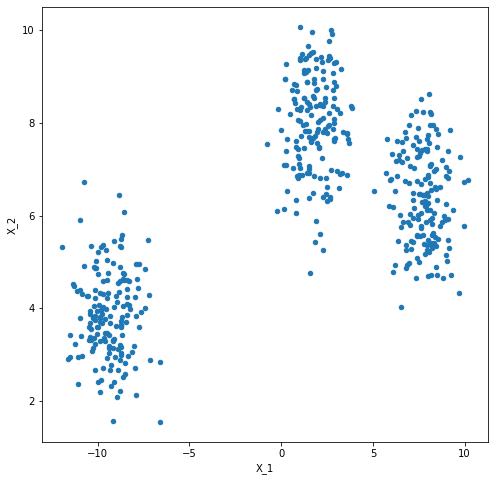

In [3]:
df = DataFrame(dict(x=X_train[:,0], y=X_train[:,1]))
fig, ax = plt.subplots(figsize=(8,8))
df.plot(ax=ax, kind='scatter', x='x', y='y')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

## 3. K-means Algorithm

In [4]:
# Initialize randomly chosen centroids (k = 3)
def init_centroids(k, X):
    arr = []
    for i in range(k):
        x1 = np.random.uniform(min(X[:,0]), max(X[:,0]))   # Generating random x1 and x2 under uniform distribution
        x2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
        arr.append([x1, x2])
    return np.asarray(arr)

In [5]:
# Calculate the Euclidean distance from each feature vector
def Euclidean_dist(a, b):
    return np.sqrt(sum(np.square(a-b)))

In [6]:
# Assign to each feature vector the closest centroid
def assign_cluster(k, X, cg):
    cluster = [-1]*len(X)
    for i in range(len(X)):
        dist_arr = []
        for j in range(k):
            dist_arr.append(Euclidean_dist(X[i], cg[j]))
        idx = np.argmin(dist_arr)
        cluster[i] = idx
    return np.asarray(cluster)

In [7]:
# Assign data points to the closest centroid
def compute_centroids(k, X, cluster):
    cg_arr = []
    for i in range(k):
        arr = []
        for j in range(len(X)):
            if cluster[j]==i:
                arr.append(X[j])
        cg_arr.append(np.mean(arr, axis=0))
    return np.asarray(cg_arr)

In [8]:
# Update centroids' new coordinate
def update_centroids(cg_prev, cg_new):
    res = 0
    for a,b in zip(cg_prev,cg_new):
        res+=Euclidean_dist(a,b)
    return res

In [9]:
# Visualize clusters
def show_clusters(X, cluster, cg):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    colors = {0:'blue', 1:'orange', 2:'green'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(cg[:, 0], cg[:, 1], marker='*', s=150, c='#ff2222')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()

## 4. K-means function and Visualization

In [10]:
def k_means(k, X):
    cg_prev = init_centroids(k, X)
    cluster = [0]*len(X)
    cg_change = 100
    while cg_change>.001:
        cluster = assign_cluster(k, X, cg_prev)
        show_clusters(X, cluster, cg_prev)
        cg_new = compute_centroids(k, X, cluster)
        cg_change = update_centroids(cg_new, cg_prev)
        cg_prev = cg_new
    return cluster

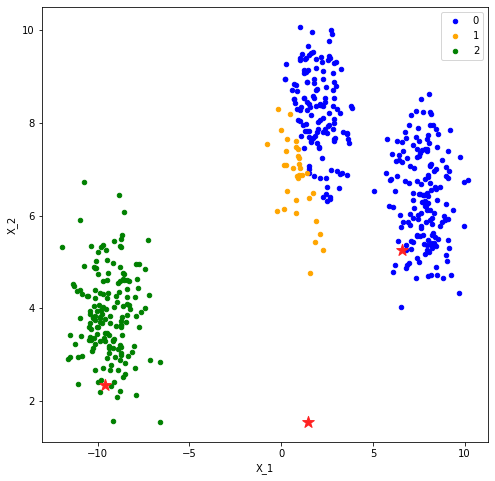

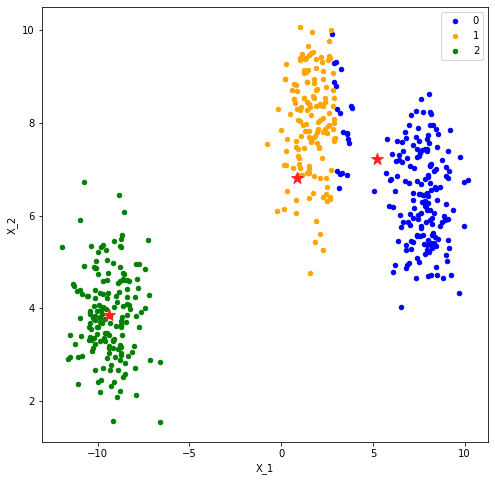

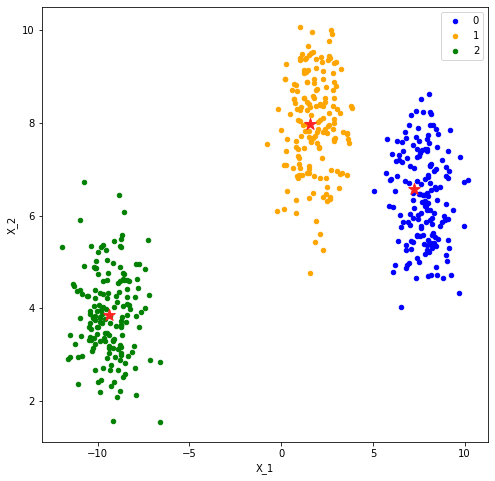

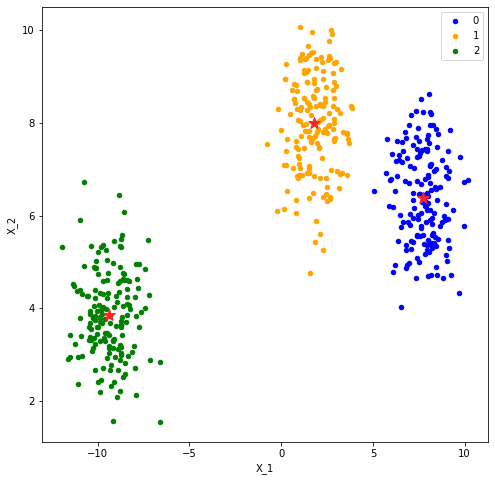

In [11]:

cluster = k_means(3, X_train)